In [1]:
!ls

Police_metric.csv   area_names_metric.csv  reproduction.ipynb
README.md	    disease_metric.csv
alias_analytics.py  ignore_list.txt


In [2]:
!pip install numpy
!pip install affinegap
!pip install levenshtein

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for affinegap: filename=affinegap-1.12-cp312-cp312-linux_x86_64.whl size=25514 sha256=428b772a7affd7af8fd4161b9a5b076123196ed342c2a7e2fbb959e302ce78b6
  Stored in directory: /home/palitohasan_gmail_com/.cache/pip/wheels/59/8f/53/de134fa15de738053628838099fe4f6e213547f82d647e8d11
Successfully built affinegap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [levenshtein]


In [5]:
from alias_analytics import  calc_prec_recall_thresh,normalized_dp_distance,jaccard,jaccard_word,normalized_affine_gap,levenshtein_distance
import Levenshtein
import affinegap
import pandas as pd
import csv

func_dict = {
    "smash": normalized_dp_distance,
    "affinegap": normalized_affine_gap,
    "jaccard":jaccard,
    "jaccard_word":jaccard_word,
    "lavenstein":levenshtein_distance
}
dataset_dict = {
    "police":"Police_metric.csv",
    "disease":"disease_metric.csv",
    "area_names":"area_names_metric.csv"
}

with open("result.csv", mode="a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Method", "Precision", "Recall", "F1-Score", "Threshold", "dataset"])

for name_set, path in dataset_dict.items():
    print("evaluating",name_set,path)
    df = pd.read_csv(path)
    for name, func in func_dict.items():
        for i in range(10):
            p,r,f =calc_prec_recall_thresh(func, df,thresh=i/10)
            new_row=[name,p,r,f,i/10,name_set]
            with open("result.csv", mode="a", newline="") as file:
                writer = csv.writer(file)
                writer.writerow(new_row) 
print("writing result done")

evaluating police Police_metric.csv
evaluating disease disease_metric.csv
evaluating area_names area_names_metric.csv
writing result done


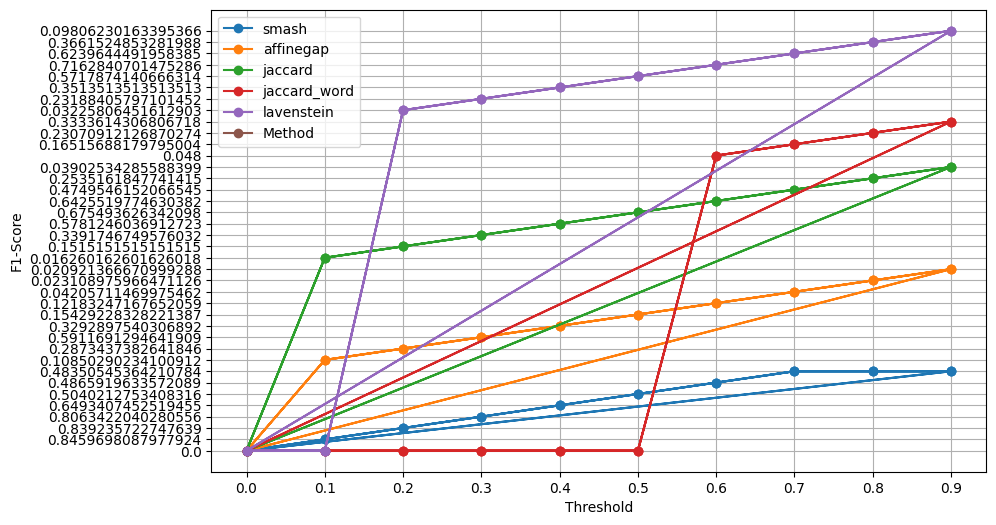

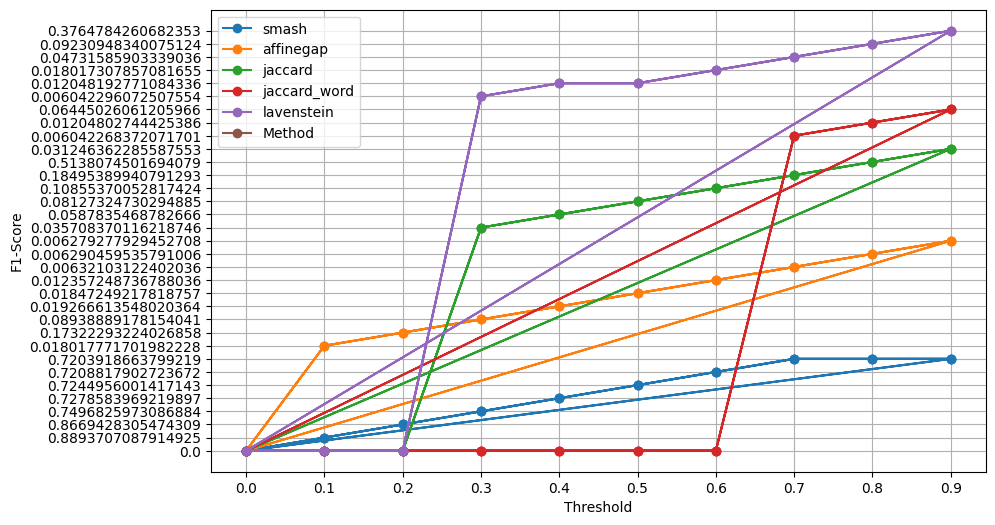

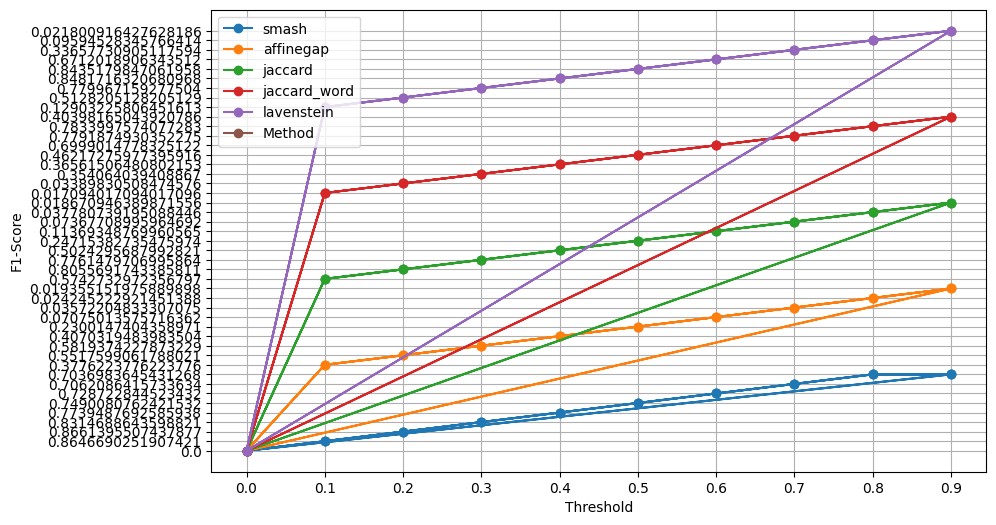

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

dataset= ['police',"disease","area_names"]
df = pd.read_csv("result.csv")
for i in dataset:
    filtered_df = df[df['dataset'] == i]
    plt.figure(figsize=(10, 6))

    methods = df["Method"].unique()
    for method in methods:
        subset = filtered_df[filtered_df["Method"] == method]
        plt.plot(subset["Threshold"], subset["F1-Score"], marker='o', label=method)
    plt.xlabel("Threshold")
    plt.ylabel("F1-Score")
    plt.legend()
    plt.grid(True)
    plt.show()
